In [1]:
## ENTRENAMIENTO Y PRUEBA DE MODELO DE RANDOM FOREST EN
## PREDICCION DE TIEMPO DE ESTANCIA EN HOSPITAL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#####################################################
# Cargar datos
print('Cargando datos...')
X = pd.read_csv('data_preprocesada.csv')
y= pd.read_csv('y.csv')
feat_labels = ['Diagnostico','Hospital','via_Ingreso','codigo_Administradora','Causa_Externa','Edad','Ocupacion','Num_Reinserciones']


# Separar en datos de entrenamiento y validacion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


Cargando datos...


In [3]:
######################################################
# Entrenar clasificador
print('Entrenando modelo Random Forest ...')
model_rf = RandomForestClassifier(n_estimators=1000, max_features=4, min_samples_leaf=10,random_state=0, n_jobs=2)
model_rf.fit(X_train, y_train.values.ravel())


Entrenando modelo Random Forest ...


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [4]:
#####################################################
# Encontrar importancia de cada variable, y graficar
importanciaVars=model_rf.feature_importances_
print('Calculando importancia de variables para prediccion ...')

Calculando importancia de variables para prediccion ...


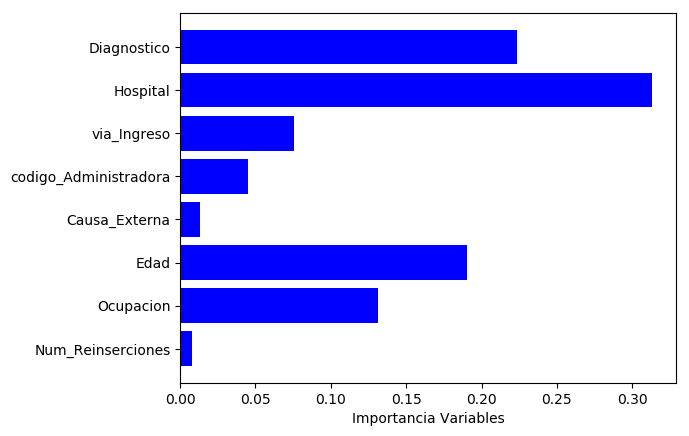

In [5]:
# Graficar barras
pos=[1, 2, 3, 4, 5, 6, 7, 8]
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(pos, importanciaVars, align='center',color='blue')
ax.set_yticks(pos)
ax.set_yticklabels(feat_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importancia Variables')
plt.show()

In [6]:
######################################################
# Realizar prediccion en datos de validacion
print('Prediccion en datos de validacion...')
y_pred = model_rf.predict(X_test)
precision=accuracy_score(y_test, y_pred)
print(precision)

Prediccion en datos de validacion...
0.6524106817353262


In [7]:
# Matriz de confusion
tabla=pd.crosstab(y_test.values.ravel(), y_pred, rownames=['Actual LOS'], colnames=['Predicted LOS'])
print(tabla)

Predicted LOS      1      2      3
Actual LOS                        
1              19785   5721   3800
2               4935  16338   8402
3               1846   5806  21143
